In [1]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Data Discovery

In [3]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [4]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [5]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

# Data Preprossing

In [6]:
X=df.drop(["DEATH_EVENT"],axis=1)
y=df["DEATH_EVENT"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## wrapper feature selection mehtod

In [7]:
efs = EFS(
    estimator=RandomForestClassifier(
    n_estimators=3, 
    random_state=0), 
    min_features=1,
    max_features=4,
    scoring='roc_auc',
    cv=2,
)
efs = efs.fit(X_train, y_train)

Features: 793/793

In [8]:
efs.best_feature_names_

('anaemia', 'ejection_fraction', 'serum_sodium', 'time')

For this particular dataset, and with the search defined in the previous code block,
the EFS evaluated 793 feature subsets, which can be obtained by executing:

In [9]:
len(efs.subsets_.keys())

793

Let’s print out the details of a random subset of features:

In [10]:
efs.subsets_[20]

{'feature_idx': (0, 9),
 'cv_scores': array([0.54713424, 0.48998145]),
 'avg_score': 0.5185578427175066,
 'feature_names': ('age', 'sex')}

In [11]:
X_train_t = efs.transform(X_train)
X_test_t = efs.transform(X_test)

In [12]:
X_test_t 

array([[  1.,  40., 141., 187.],
       [  1.,  40., 136., 172.],
       [  1.,  30., 137.,  11.],
       [  0.,  35., 140., 197.],
       [  0.,  30., 132., 210.],
       [  1.,  60., 137., 107.],
       [  0.,  25., 130., 207.],
       [  1.,  45., 136., 187.],
       [  0.,  62., 146.,  43.],
       [  0.,  38., 133.,  88.],
       [  0.,  35., 139., 212.],
       [  1.,  50., 136.,  13.],
       [  1.,  25., 137., 170.],
       [  0.,  25., 138., 214.],
       [  1.,  35., 140.,  20.],
       [  0.,  20., 134.,  73.],
       [  0.,  35., 132., 244.],
       [  0.,  45., 136.,  80.],
       [  1.,  35., 140., 206.],
       [  1.,  30., 142., 216.],
       [  0.,  35., 134., 174.],
       [  0.,  30., 140.,  87.],
       [  0.,  40., 134.,  96.],
       [  1.,  35., 145., 105.],
       [  0.,  20., 134., 198.],
       [  1.,  60., 136.,  94.],
       [  0.,  20., 135., 180.],
       [  1.,  40., 135., 250.],
       [  0.,  38., 143., 270.],
       [  0.,  40., 130., 214.],
       [  

# naives bayes

In [17]:
X = df.drop(['age', 'creatinine_phosphokinase', 'diabetes',
     'high_blood_pressure', 'platelets',
        'serum_sodium', 'sex', 'smoking','DEATH_EVENT'],axis=1)
y=df["DEATH_EVENT"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Don't distrubte Machine is learning!🤖

In [18]:
model_NB = GaussianNB()
model_NB.fit(X_train, y_train)

GaussianNB()

## Let 's Test the Machine 

In [19]:
y_pred_NB = model_NB.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_NB})

,Actual,Predicted
206,0,0
188,0,0
12,1,1
219,0,0
237,0,0
...,...,...
156,0,0
226,0,0
272,0,0
27,1,0


In [20]:
accuracy_NB = accuracy_score(y_test, y_pred_NB)
accuracy_NB

0.76

# Decision Tree

# Don't distrubte Machine is learning!🤖

In [22]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 100, 
                                      max_depth=3, min_samples_leaf=5)
clf = clf.fit(X_train, y_train)

[Text(0.4230769230769231, 0.875, 'x[3] <= 73.5\nentropy = 0.891\nsamples = 224\nvalue = [155, 69]'),
 Text(0.15384615384615385, 0.625, 'x[1] <= 27.5\nentropy = 0.677\nsamples = 56\nvalue = [10, 46]'),
 Text(0.07692307692307693, 0.375, 'entropy = 0.0\nsamples = 19\nvalue = [0, 19]'),
 Text(0.23076923076923078, 0.375, 'x[3] <= 49.5\nentropy = 0.842\nsamples = 37\nvalue = [10, 27]'),
 Text(0.15384615384615385, 0.125, 'entropy = 0.65\nsamples = 30\nvalue = [5, 25]'),
 Text(0.3076923076923077, 0.125, 'entropy = 0.863\nsamples = 7\nvalue = [5, 2]'),
 Text(0.6923076923076923, 0.625, 'x[2] <= 1.25\nentropy = 0.576\nsamples = 168\nvalue = [145, 23]'),
 Text(0.5384615384615384, 0.375, 'x[3] <= 173.0\nentropy = 0.325\nsamples = 118\nvalue = [111, 7]'),
 Text(0.46153846153846156, 0.125, 'entropy = 0.52\nsamples = 60\nvalue = [53, 7]'),
 Text(0.6153846153846154, 0.125, 'entropy = 0.0\nsamples = 58\nvalue = [58, 0]'),
 Text(0.8461538461538461, 0.375, 'x[1] <= 32.5\nentropy = 0.904\nsamples = 50\nval

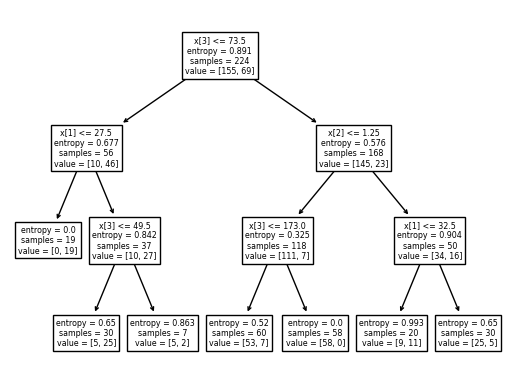

In [23]:
tree.plot_tree(clf)

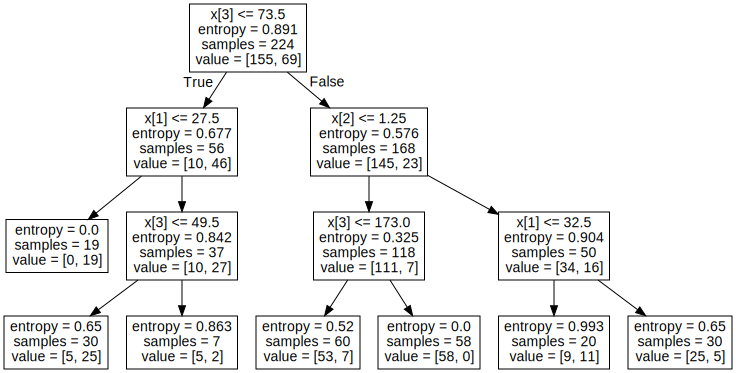

In [24]:
# GraphViz gives a better and clearer Graph.
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph

## Let 's Test the Machine 

In [25]:
y_pred = clf.predict(X_test)

In [26]:
# verifying if the model has predicted it all right.
y_pred == y_test

206     True
188     True
12      True
219     True
237     True
       ...  
156     True
226    False
272     True
27      True
144     True
Name: DEATH_EVENT, Length: 75, dtype: bool

At the beggining before using feature selection method the accuracy was 1, overfitting! 
we this problem by implementing wrapping method.

In [27]:
accuracy_NB = accuracy_score(y_test, y_pred)
accuracy_NB

0.8533333333333334